In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### HDI rank:

Type: Ordinal variable.

Reason: The HDI rank represents a ranking of countries based on their Human Development Index. The order is meaningful, but the difference between ranks is not necessarily uniform.

### Country:

Type: Nominal variable.

Reason: The names of countries are categorical and serve as labels. They do not imply any numerical or ranked relationship between them.

### Human Development Index (HDI) Value:

Type: Interval variable.

Reason: HDI values represent a composite index on a scale (usually 0 to 1), with meaningful differences between values, but no true zero point.

### Life expectancy at birth (years):

Type: Ratio variable.

Reason: Life expectancy is a continuous, quantitative measure with a meaningful zero point (0 years), allowing for meaningful comparisons of ratios (e.g., 80 years is twice as long as 40 years).

### Expected years of schooling (years):

Type: Ratio variable.

Reason: This is a quantitative measure with a meaningful zero (0 years), and comparisons between values are meaningful in terms of ratios.

### Mean years of schooling (years):

Type: Ratio variable.

Reason: Similar to expected years of schooling, mean years of schooling is a quantitative measure with a true zero point.

### Gross national income (GNI) per capita (2017 PPP $):

Type: Ratio variable.

Reason: GNI per capita is a quantitative measure of income with a meaningful zero (no income), and you can compare income levels in terms of ratios.

### GNI per capita rank minus HDI rank:
Type: Ordinal variable.

Reason: This represents the difference between two ranks (GNI and HDI ranks), which retains the properties of ordinal data because ranks are inherently ordered but not evenly spaced.

In [38]:
data = pd.read_csv('./hdi_cleaned.csv')
data.head()

,rank,country,HDI,life_expectancy,expect_schooling_years,mean_schooling_years,GNI,GNI_per_capita,HDI rank
0,1,Switzerland,0.967,84.3,16.6,13.9,"69,433",6,1.0
1,2,Norway,0.966,83.4,18.6,13.1,"69,190",6,2.0
2,3,Iceland,0.959,82.8,19.1,13.8,"54,688",16,4.0
3,4,"Hong Kong, China (SAR)",0.956,84.3,17.8,12.3,"62,486",6,3.0
4,5,Denmark,0.952,81.9,18.8,13.0,"62,019",6,8.0


In [39]:
data.describe()

,rank,HDI,life_expectancy,expect_schooling_years,mean_schooling_years,GNI_per_capita,HDI rank
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,191.000000
mean,96.854922,0.723741,71.844560,13.535751,9.011917,0.145078,96.146597
std,55.911665,0.155177,7.861522,3.029098,3.221399,14.575939,55.675559
min,1.000000,0.380000,53.000000,5.600000,1.300000,-54.000000,1.000000
25%,49.000000,0.602000,65.900000,11.600000,6.500000,-9.000000,48.500000
50%,97.000000,0.740000,72.200000,13.300000,9.400000,2.000000,95.000000
75%,145.000000,0.847000,77.900000,15.700000,11.700000,9.000000,144.500000
max,193.000000,0.967000,84.800000,21.100000,14.300000,40.000000,192.000000


# Correlation between life expectancy and HDI

Note: We are correlating HDI which isn't an SDG but rather a scale taking into account other SDGs. We need to correlate 2 SDG's for the presentation to be valid, so this is just an example.

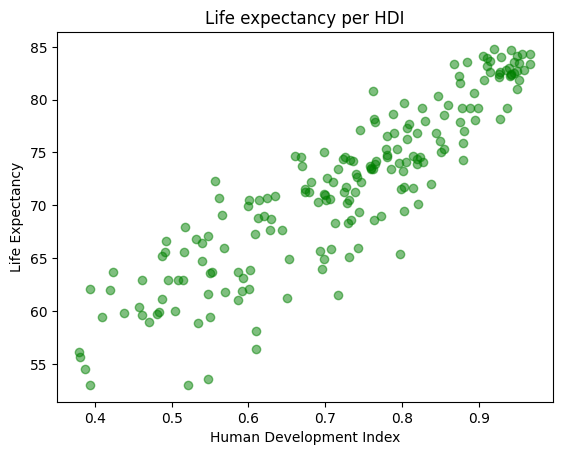

In [40]:
HDI = data['HDI']
life_expectancy = data['life_expectancy']
plt.scatter(HDI,life_expectancy, color='g', alpha=0.5)
plt.xlabel('Human Development Index')
plt.ylabel('Life Expectancy')
plt.title('Life expectancy per HDI')
plt.show()

Here we can see that as our independent variable in this example the Human Development Index (HDI) rises, so does our dependent variable life expectancy. This indicates a positive relationship between the two variables, suggesting that higher HDI values are associated with longer life expectancy. Since both HDI and life expectancy are continuous variables (with HDI being an interval variable and life expectancy being a ratio variable), Pearson's correlation is appropriate for analyzing this relationship, and we can assume a positive linear correlation.

In [41]:
r = HDI.corr(life_expectancy)
print(f"Pearsons Correlation Coefficient: {r:.2f}")

Pearsons Correlation Coefficient: 0.90


Our data shows a strong positive correlation between HDI and life expectancy.

|Correlation Coefficient (r)|	Interpretation|
| --- | --- |
| 1.0 | Perfect Positive Correlation |
| 0.7 to 0.99 | Strong Positive Correlation |
| 0.3 to 0.69 |	Moderate Positive Correlation |
| 0 to 0.29	| Weak Positive Correlation |
| 0	| No Correlation | 
| -0.29 to 0 | Weak Negative Correlation | 
| -0.3 to -0.69 |	Moderate Negative Correlation |
| -0.7 to -0.99	| Strong Negative Correlation |
| -1.0	Perfect | Negative Correlation |

Now that we have established our variables exhibit a linear relationship through visual inspection using a scatter plot and through
Pearson's coefficient we can move on to determining the equation of the regression line used in order to see the trend and make predictions
on the basis of the data.

Note: errors occur due to missing values in the dataset, which results into lacking coefficients and can mess with the linear algebra matrix manipulations and is the reason why we disregard the last two countries.

In [42]:
# calculate the regression line
# Using numpy.polyfit to get the slope (m) and intercept (b)
slope, intercept = np.polyfit(HDI, life_expectancy, 1)

# create the regression line
data['predicted_life_expectancy'] = slope * HDI + intercept

print(f'The equation of the regression line is: Life Expectancy = {slope:.2f} * HDI + {intercept:.2f}')

The equation of the regression line is: Life Expectancy = 45.51 * HDI + 38.90


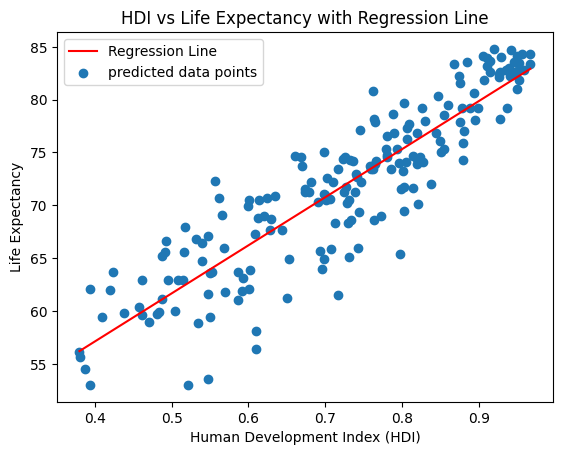

In [44]:
# plot the regression line
plt.scatter(HDI, life_expectancy, label='predicted data points')
plt.plot(HDI, data['predicted_life_expectancy'], color='red', label='Regression Line')
plt.title('HDI vs Life Expectancy with Regression Line')
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

## Summary...

# Correlation between years of schooling and GNI per capita

We're also curious on the correlation between GNI per capita and mean years of schooling